<a href="https://colab.research.google.com/github/KoMurase/approach_for_imbalanced_data/blob/main/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00192/BreastTissue.xls"

In [11]:
#!pip install pandas==1.2.0

In [12]:
#!pip install --upgrade xlrd

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.datasets import fetch_datasets
import pandas as pd

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import numpy as np

np.random.seed(1)

https://imbalanced-learn.org/stable/datasets/index.html
に紹介されている大腸菌データセットを使用する。

In [15]:
ecoli = fetch_datasets()['ecoli']
ecoli

{'DESCR': 'ecoli', 'data': array([[0.49, 0.29, 0.48, ..., 0.56, 0.24, 0.35],
        [0.07, 0.4 , 0.48, ..., 0.54, 0.35, 0.44],
        [0.56, 0.4 , 0.48, ..., 0.49, 0.37, 0.46],
        ...,
        [0.61, 0.6 , 0.48, ..., 0.44, 0.39, 0.38],
        [0.59, 0.61, 0.48, ..., 0.42, 0.42, 0.37],
        [0.74, 0.74, 0.48, ..., 0.31, 0.53, 0.52]]), 'target': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, 

In [16]:
ecoli['data']

array([[0.49, 0.29, 0.48, ..., 0.56, 0.24, 0.35],
       [0.07, 0.4 , 0.48, ..., 0.54, 0.35, 0.44],
       [0.56, 0.4 , 0.48, ..., 0.49, 0.37, 0.46],
       ...,
       [0.61, 0.6 , 0.48, ..., 0.44, 0.39, 0.38],
       [0.59, 0.61, 0.48, ..., 0.42, 0.42, 0.37],
       [0.74, 0.74, 0.48, ..., 0.31, 0.53, 0.52]])

In [17]:
ecoli['data'][0:10,0]

array([0.49, 0.07, 0.56, 0.59, 0.23, 0.67, 0.29, 0.21, 0.2 , 0.42])

In [18]:
data = pd.DataFrame({'f0':ecoli['data'][:,0],
                     'f1':ecoli['data'][:,1],
                     'f2':ecoli['data'][:,2],
                     'f3':ecoli['data'][:,3], 
                     'f4':ecoli['data'][:,4],
                     'f5':ecoli['data'][:,5],
                     'f6':ecoli['data'][:,6],
                     'target':ecoli['target']})

In [19]:
data

,f0,f1,f2,f3,f4,f5,f6,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,-1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,-1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,-1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,-1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,-1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,-1
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,-1
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,-1
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,-1


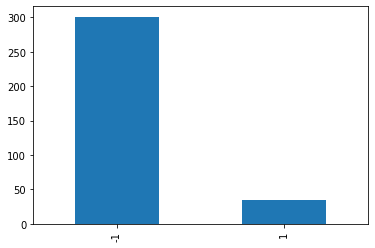

In [20]:
data["target"].value_counts(normalize=False).plot(kind='bar')
plt.show()

In [21]:
data["target"].value_counts(normalize=True)

-1    0.895833
 1    0.104167
Name: target, dtype: float64

In [22]:
data["target"].value_counts(normalize=False)

-1    301
 1     35
Name: target, dtype: int64

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data.drop('target', axis=1))

PCA(n_components=2)

In [24]:
df = pca.transform(data.drop('target', axis=1))


# 2次元に圧縮を行い、可視化をする。


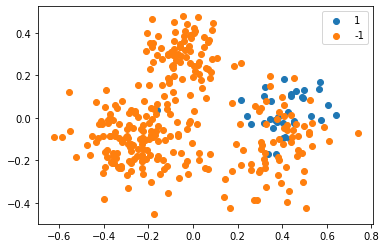

In [25]:
import matplotlib.pyplot as plt

for i in [1, -1]:
  idx = data.loc[data['target']==i].index.values
  plt.scatter(df[idx, 0], df[idx, 1], label=str(i))
plt.legend()
plt.show()

In [26]:
data

,f0,f1,f2,f3,f4,f5,f6,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,-1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,-1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,-1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,-1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,-1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,-1
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,-1
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,-1
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,-1


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), 
                                                    data['target'], 
                                                    test_size=0.3,
                                                    stratify=data['target'],
                                                    random_state=42
                                                    )

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.metrics import f1_score


#clf = RandomForestClassifier(max_depth=10, random_state=0)
#clf.fit(X_train, y_train)

In [29]:
max_score = 0
SearchMethod = 0
RFC_grid = {RandomForestClassifier(): {"n_estimators": [i for i in range(1, 21)],
                                       "criterion": ["gini", "entropy"],
                                       "max_depth":[i for i in range(1, 5)],
                                       "random_state": [i for i in range(0, 101)]
                                      }}


#ランダムフォレストの実行
for model, param in tqdm(RFC_grid.items()):
    clf = GridSearchCV(model, param)
    clf.fit(X_train, y_train)
    pred_y = clf.predict(X_test)
    score = f1_score(y_test, pred_y, average="macro")

    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        best_model = model.__class__.__name__

print("max score:{}".format(max_score))
print("model:{}".format(best_model))
print("params:{}".format(best_param))

"""#ハイパーパラメータを調整しない場合との比較
model = RandomForestClassifier()
model.fit(train_X, train_y)
score = model.score(test_X, test_y)
print("")
print("デフォルトスコア:", score)"""

100%|██████████| 1/1 [21:54<00:00, 1314.95s/it]

max score:0.8394276629570747
model:RandomForestClassifier
params:{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 9, 'random_state': 79}


'#ハイパーパラメータを調整しない場合との比較\nmodel = RandomForestClassifier()\nmodel.fit(train_X, train_y)\nscore = model.score(test_X, test_y)\nprint("")\nprint("デフォルトスコア:", score)'

In [31]:
best_param

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 9, 'random_state': 79}

In [34]:
model = RandomForestClassifier(**best_param)
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97        90
           1       1.00      0.55      0.71        11

    accuracy                           0.95       101
   macro avg       0.97      0.77      0.84       101
weighted avg       0.95      0.95      0.94       101



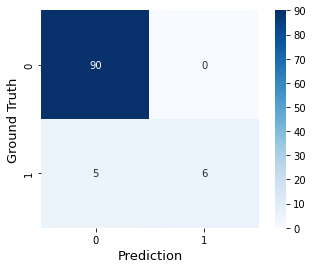

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Prediction", fontsize=13)
plt.ylabel("Ground Truth", fontsize=13)
plt.show()
#plt.savefig('sklearn_confusion_matrix.png')

# SMOTEを用いてオーバーサンプリングを行う

- k_neighbors : オーバーサンプリンするために参照する少数派点の同士の近傍の数。

- sampling_strategy : リサンプリング後の多数クラスのサンプル数に対する少数クラスのサンプル数の比率
比率は、$N_{rm}$をリサンプリング後の少数クラスのサンプル数、$N_{M}$を多数クラスのサンプル数とすると、
$ \alpha_{os} = N_{rm} ／ N_{M} $と表されます。

In [37]:
oversample = SMOTE(k_neighbors=5, random_state=1, sampling_strategy=0.2)
X, y = oversample.fit_resample(X_train, y_train)

In [38]:
X.shape, X_train.shape

((253, 7), (235, 7))

In [39]:
X

,f0,f1,f2,f3,f4,f5,f6
0,0.410000,0.510000,0.48,0.5,0.530000,0.750000,0.780000
1,0.350000,0.480000,0.48,0.5,0.560000,0.400000,0.480000
2,0.510000,0.490000,0.48,0.5,0.530000,0.140000,0.260000
3,0.340000,0.510000,0.48,0.5,0.440000,0.370000,0.460000
4,0.410000,0.570000,0.48,0.5,0.390000,0.210000,0.320000
...,...,...,...,...,...,...,...
248,0.823846,0.495384,0.48,0.5,0.625386,0.793845,0.817691
249,0.575167,0.311014,0.48,0.5,0.637528,0.748764,0.770000
250,0.750515,0.405784,0.48,0.5,0.504216,0.595270,0.626324
251,0.876598,0.425953,0.48,0.5,0.522551,0.734252,0.749150


In [40]:
y

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
248    1
249    1
250    1
251    1
252    1
Name: target, Length: 253, dtype: int64

In [41]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [42]:
df = pd.DataFrame( pca.transform(X) )

In [43]:
df['target'] = y

In [44]:
df

,0,1,target
0,0.284560,-0.184535,-1
1,-0.157647,-0.109807,-1
2,-0.423916,0.106249,-1
3,-0.213664,-0.101138,-1
4,-0.393369,0.039388,-1
...,...,...,...
248,0.492237,0.098576,1
249,0.343633,-0.158441,1
250,0.187987,0.072169,1
251,0.405646,0.121842,1


# 二次元に圧縮を行い、可視化を行う

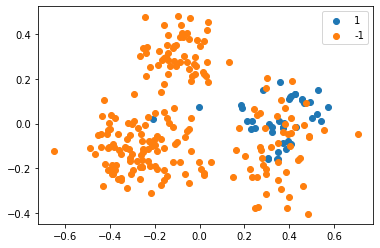

In [45]:
for i in [1, -1]:
  idx = df.loc[df['target']==i].index.values
  plt.scatter(df.loc[idx, 0], df.loc[idx, 1], label=str(i))
plt.legend()
plt.show()

少数派のデータが増えていることが分かる

In [47]:
max_score = 0
SearchMethod = 0
RFC_grid = {RandomForestClassifier(): {"n_estimators": [i for i in range(1, 21)],
                                       "criterion": ["gini", "entropy"],
                                       "max_depth":[i for i in range(1, 5)],
                                       #"random_state": [i for i in range(0, 101)]
                                      }}


#ランダムフォレストの実行
for model, param in tqdm(RFC_grid.items()):
    clf_2 = GridSearchCV(model, param)
    clf_2.fit(X_train, y_train)
    pred_y = clf_2.predict(X_test)
    score = f1_score(y_test, pred_y, average="macro")

    if max_score < score:
        max_score = score
        best_param = clf_2.best_params_
        best_model_name = model.__class__.__name__
        best_model = clf_2

print("max score:{}".format(max_score))
print("model:{}".format(best_model_name))
print("params:{}".format(best_param))

100%|██████████| 1/1 [00:14<00:00, 14.57s/it]

max score:0.7963709677419355
model:RandomForestClassifier
params:{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 6}


In [48]:
"""clf_2 = RandomForestClassifier(best_param)
clf_2.fit(X, y)"""

'clf_2 = RandomForestClassifier(best_param)\nclf_2.fit(X, y)'

In [49]:
y_pred_2 = best_model.predict(X_test)
y_pred_2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1])

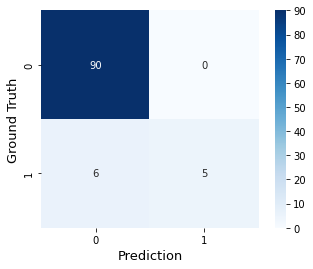

In [50]:
cm = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Prediction", fontsize=13)
plt.ylabel("Ground Truth", fontsize=13)
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97        90
           1       1.00      0.55      0.71        11

    accuracy                           0.95       101
   macro avg       0.97      0.77      0.84       101
weighted avg       0.95      0.95      0.94       101



In [52]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97        90
           1       1.00      0.45      0.62        11

    accuracy                           0.94       101
   macro avg       0.97      0.73      0.80       101
weighted avg       0.94      0.94      0.93       101



# まとめ

今回は、大腸菌の不均衡なデータセットに対して、imblearnに用意されているSMOTE$^{1}$を用いてオーバーサンプリングを行った。

結果はオーバーサンプリングを行った場合の精度が低くなったため、今回、対象としたデータセットに不向きな手法であったことが伺える。

他の手法についても調査が必要である。

1: Synthetic Minority Over-sampling Technique（Chawla, N., et al. 2002）